In [1]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Load dataset

df = pd.read_csv("sales_data.csv")
df.shape

(1000, 14)

In [3]:
# Display first rows, info and basic statistics

df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [4]:
print('--- DataFrame Info ---')
df.info()

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1

In [5]:
print('--- Numerical Statistics ---')
display(df.describe())

--- Numerical Statistics ---


,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [6]:
# Compute total sales and best-selling product (by Sales_Amount)

total_sales = df['Sales_Amount'].sum()
product_sales = df.groupby('Product_ID', as_index=False)['Sales_Amount'].sum().sort_values('Sales_Amount', ascending=False)
best_product_id = int(product_sales.iloc[0]['Product_ID'])
best_product_sales = float(product_sales.iloc[0]['Sales_Amount'])

print(f"Total Sales: {total_sales:.2f}")
print("\nBest-selling product:")
print(f"- Product ID: {best_product_id}")
print(f"- Total Sales: {best_product_sales:.2f}")

# Save a small text report
report_text = f"""Simple Sales Report
-------------------
Total Sales: {total_sales:.2f}

Best-Selling Product:
- Product ID: {best_product_id}
- Total Sales: {best_product_sales:.2f}
"""

with open('week_3_report.txt', 'w') as f:
    f.write(report_text)

Total Sales: 5019265.23

Best-selling product:
- Product ID: 1099
- Total Sales: 101773.87


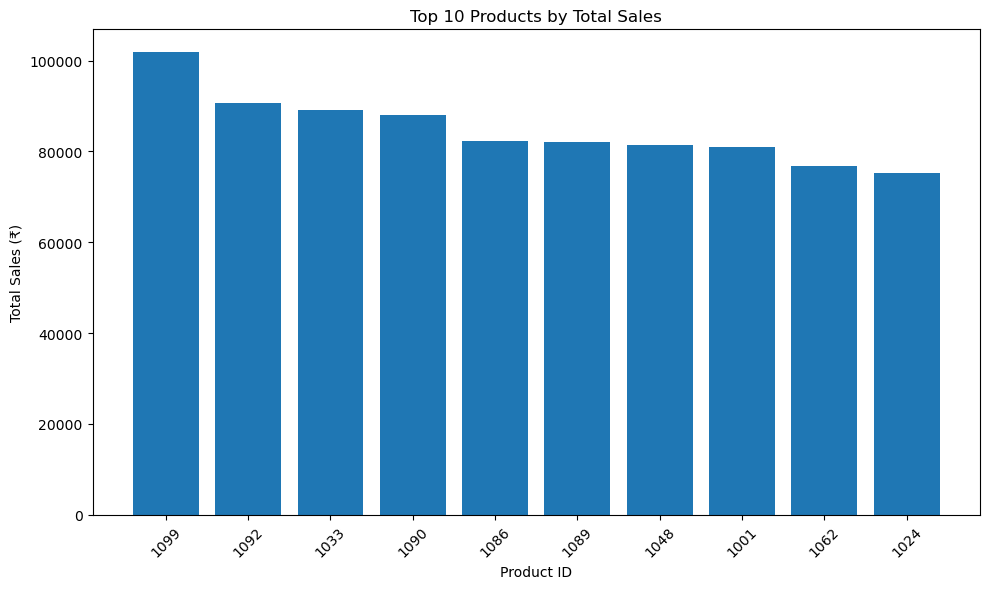

In [7]:
# Plot top 10 products by sales

top_n = 10
top_products = product_sales.head(top_n).copy()
top_products['Product_ID'] = top_products['Product_ID'].astype(str)  # for nicer x-axis labels

plt.figure(figsize=(10,6))
plt.bar(top_products['Product_ID'], top_products['Sales_Amount'])
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Save aggregated product_sales to CSV for reference

product_sales.to_csv('product_sales_summary.csv', index=False)

df1 = pd.read_csv('product_sales_summary.csv')
df1.head()

,Product_ID,Sales_Amount
0,1099,101773.87
1,1092,90615.62
2,1033,89130.41
3,1090,88043.25
4,1086,82269.71
